Analyse exploratoire des données (test)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyxlsb
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit


In [4]:
dfs = {}
# Boucle pour charger chaque fichier de Partie_01 à Partie_09
for i in range(1, 10):
    # Construire le chemin de fichier dynamiquement
    chemin = f"C:\\Users\\aslam\\Documents\\Stage\\12-Data\\2 - Test Pack 48V Critt M2A\\ID3186_05_Sequence_Cyclage_Partie_0{i}.xlsb"
    
    # Charger le DataFrame depuis le fichier
    df = pd.read_excel(chemin, sheet_name="Feuil1")
    
    # Enlever la colonne en double
    df.drop(df.columns[40], axis=1, inplace=True)
    
    # Stocker le DataFrame dans le dictionnaire avec une clé dynamique
    dfs[f'df{i}'] = df

In [5]:
for key in dfs.keys():
    # Remonter toutes les lignes dans le DataFrame actuel
    dfs[key] = dfs[key].shift(-1)
    
    # Supprimer la dernière ligne qui est devenue redondante après le décalage
    dfs[key].drop(dfs[key].index[-1], inplace=True)
    
    # Réinitialiser les index
    dfs[key].reset_index(drop=True, inplace=True)
    
    # Convertir toutes les colonnes en float
    dfs[key] = dfs[key].astype(float)


In [6]:
dfs['df1'].head()

,t,CycleCnt01,BMS_Tension_A,BMS_Tension_B,BMS_Mode_Ctrl,Phase_Test,Etat_step,SysDate,SysTime,Step.Time,...,C6_CyclingStatus,C7_CyclingStatus,C8_CyclingStatus,C9_CyclingStatus,C10_CyclingStatus,C11_CyclingStatus,C12_CyclingStatus,C13_CyclingStatus,C14_CyclingStatus,C15_CyclingStatus
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000,1.0,3.299,0.0,1.0,0.0,0.0,20220615.0,154118.0,0.000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.001,1.0,3.299,0.0,1.0,0.0,0.0,20220615.0,154118.0,0.001,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.002,1.0,3.299,0.0,1.0,1.0,0.0,20220615.0,154118.0,0.000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.003,1.0,3.299,0.0,1.0,1.0,0.0,20220615.0,154118.0,0.001,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
dfs['df1'].describe()

,t,CycleCnt01,BMS_Tension_A,BMS_Tension_B,BMS_Mode_Ctrl,Phase_Test,Etat_step,SysDate,SysTime,Step.Time,...,C6_CyclingStatus,C7_CyclingStatus,C8_CyclingStatus,C9_CyclingStatus,C10_CyclingStatus,C11_CyclingStatus,C12_CyclingStatus,C13_CyclingStatus,C14_CyclingStatus,C15_CyclingStatus
count,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,2.083030e+05,208303.000000,208303.000000,...,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000
mean,104.151000,26.795980,2.560762,0.779707,1.248503,2.478447,1.212210,2.022062e+07,118746.222066,1246.538686,...,1.035900,0.750354,0.938037,0.946568,1.178581,0.741674,1.020595,1.031229,1.347244,0.731257
std,60.132041,15.238275,1.374660,1.401379,0.459790,0.867672,0.436979,1.220609e+00,68896.936407,884.214584,...,1.921124,0.432809,1.360000,1.404422,2.340424,0.437715,1.629750,1.666550,2.746833,0.443307
min,0.000000,1.000000,-0.012000,-0.001000,1.000000,0.000000,0.000000,2.022062e+07,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.075500,14.000000,3.299000,0.000000,1.000000,2.000000,1.000000,2.022062e+07,61221.000000,482.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,104.151000,27.000000,3.299000,0.001000,1.000000,2.000000,1.000000,2.022062e+07,120525.000000,1035.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,156.226500,40.000000,3.299000,0.001000,1.000000,2.000000,1.000000,2.022062e+07,174455.000000,2002.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,208.302000,53.000000,3.300000,3.319000,3.000000,5.000000,2.000000,2.022062e+07,235958.000000,3600.001000,...,15.000000,1.000000,15.000000,15.000000,15.000000,1.000000,15.000000,15.000000,15.000000,1.000000


### Le voltage en fonction du temps

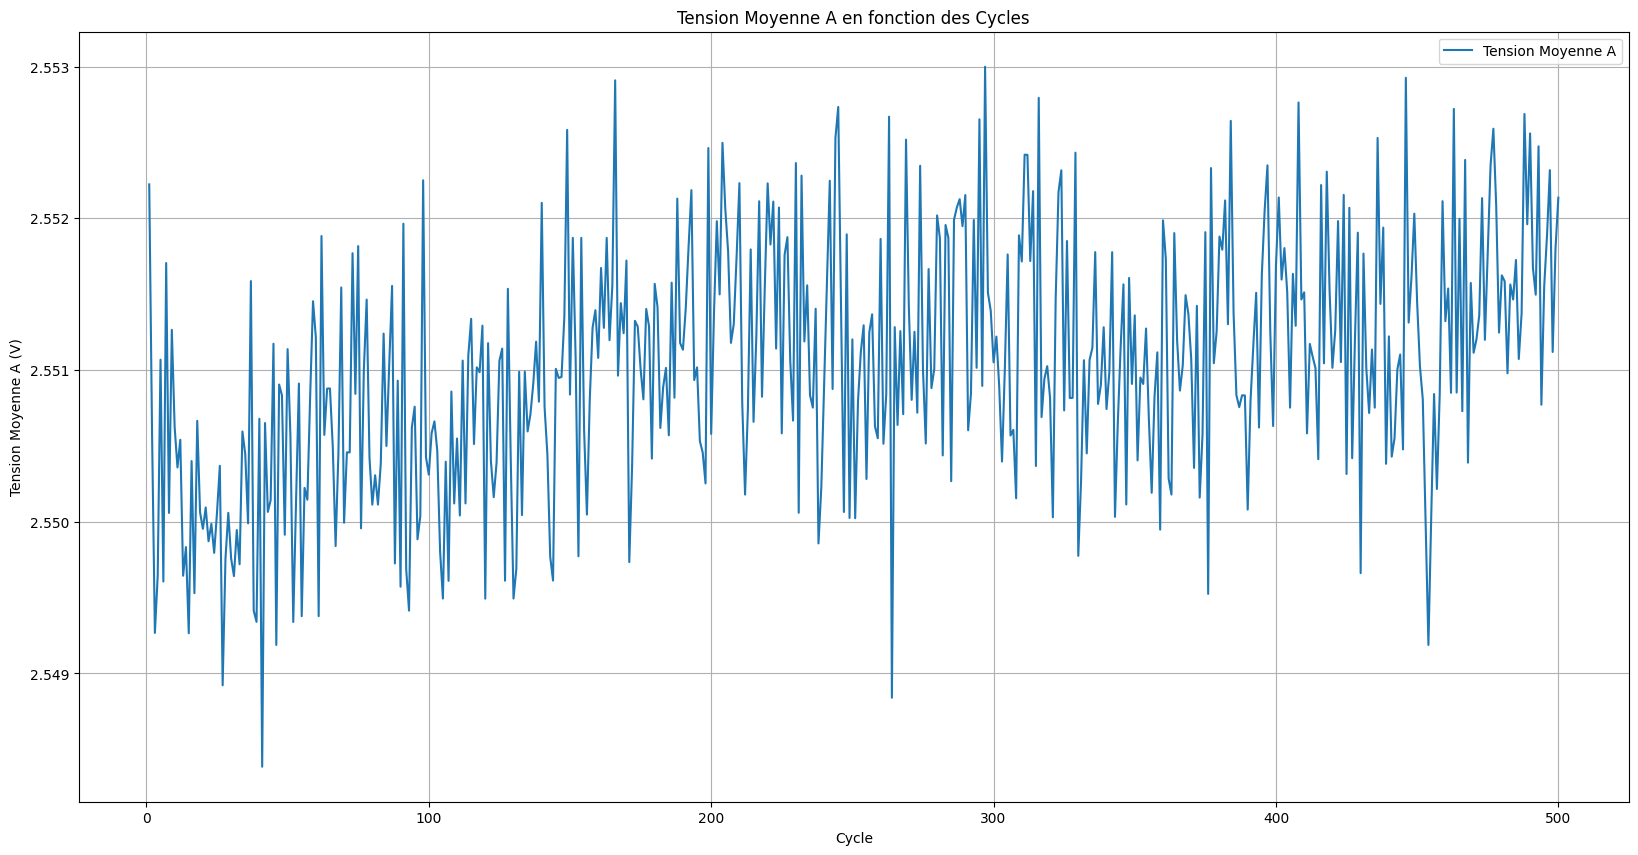

In [13]:
# Initialiser un DataFrame vide pour rassembler toutes les données de tension
df_tension_tous = pd.DataFrame()

# Boucle pour accéder à chaque DataFrame stocké dans le dictionnaire dfs et concaténer les données de tension
for i in range(1, 10):
    df_key = f'df{i}'
    if df_key in dfs:
        # Extraire les données de tension et de cycle
        df_temp = dfs[df_key][['CycleCnt01', 'BMS_Tension_A']].copy()
        
        # Ajouter les données de ce DataFrame au DataFrame global
        df_tension_tous = pd.concat([df_tension_tous, df_temp])

# Calculer la tension moyenne pour chaque cycle à travers tous les DataFrames
tension_moyenne_par_cycle_global = df_tension_tous.groupby('CycleCnt01')['BMS_Tension_A'].mean()

# Tracer la tension moyenne globale pour chaque cycle
plt.figure(figsize=(20, 10))
plt.plot(tension_moyenne_par_cycle_global.index, tension_moyenne_par_cycle_global.values, label='Tension Moyenne A')

plt.title('Tension Moyenne A en fonction des Cycles')
plt.xlabel('Cycle')
plt.ylabel('Tension Moyenne A (V)')
plt.legend()
plt.grid(True)
plt.show()

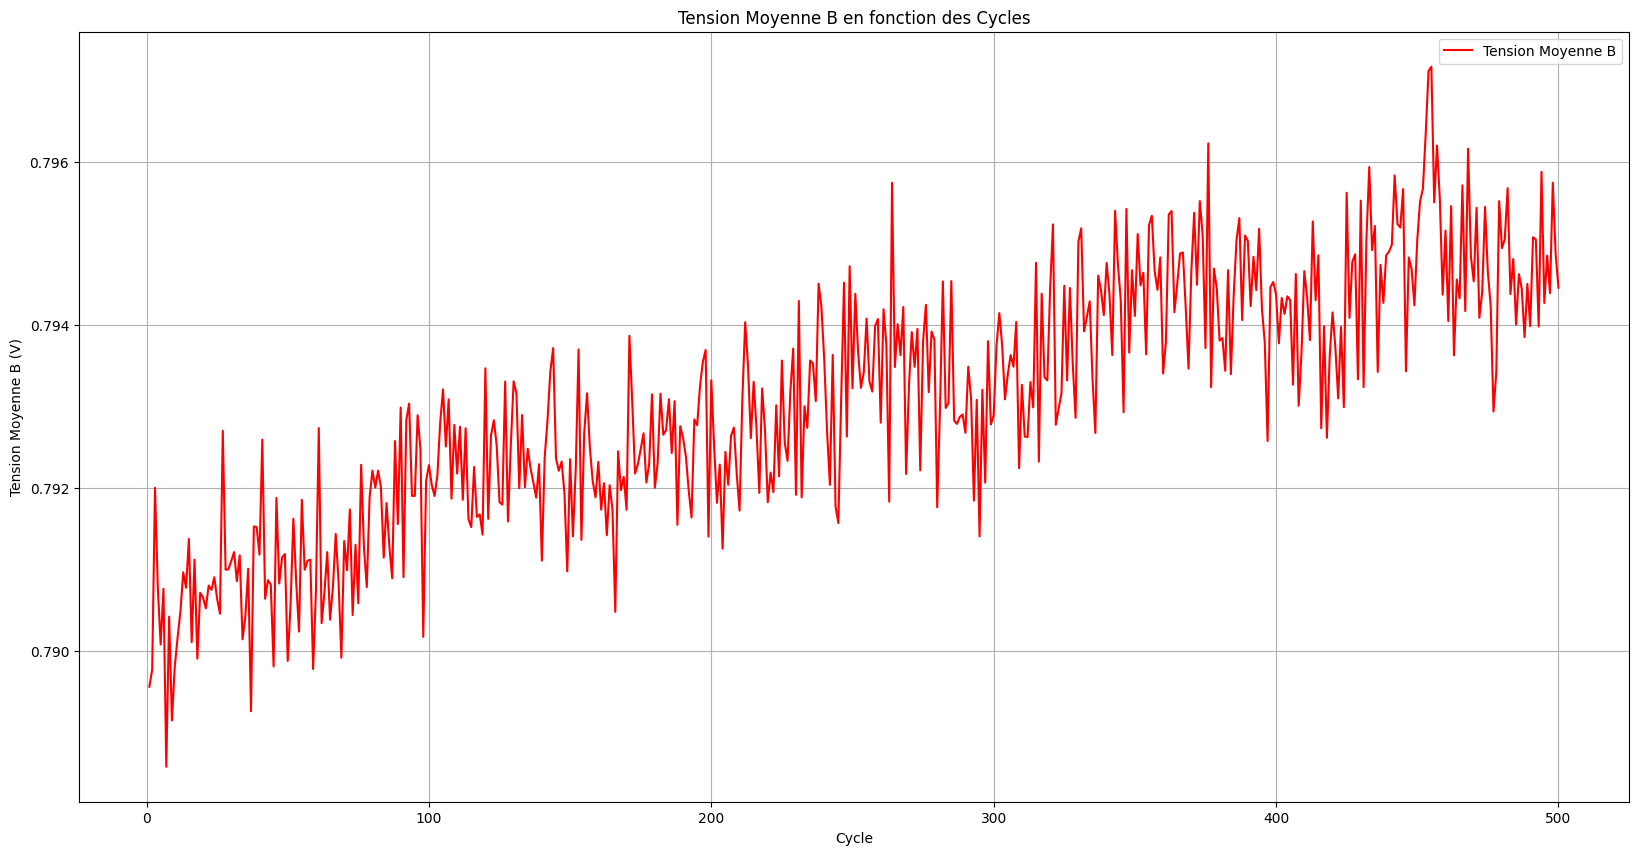

In [14]:
# Initialiser un DataFrame vide pour rassembler toutes les données de tension
df_tension_tous = pd.DataFrame()

# Boucle pour accéder à chaque DataFrame stocké dans le dictionnaire dfs et concaténer les données de tension
for i in range(1, 10):
    df_key = f'df{i}'
    if df_key in dfs:
        # Extraire les données de tension et de cycle
        df_temp = dfs[df_key][['CycleCnt01', 'BMS_Tension_B']].copy()
        
        # Ajouter les données de ce DataFrame au DataFrame global
        df_tension_tous = pd.concat([df_tension_tous, df_temp])

# Calculer la tension moyenne pour chaque cycle à travers tous les DataFrames
tension_moyenne_par_cycle_global = df_tension_tous.groupby('CycleCnt01')['BMS_Tension_B'].mean()

# Tracer la tension moyenne globale pour chaque cycle
plt.figure(figsize=(20, 10))
plt.plot(tension_moyenne_par_cycle_global.index, tension_moyenne_par_cycle_global.values, label='Tension Moyenne B',color='red')

plt.title('Tension Moyenne B en fonction des Cycles')
plt.xlabel('Cycle')
plt.ylabel('Tension Moyenne B (V)')
plt.legend()
plt.grid(True)
plt.show()

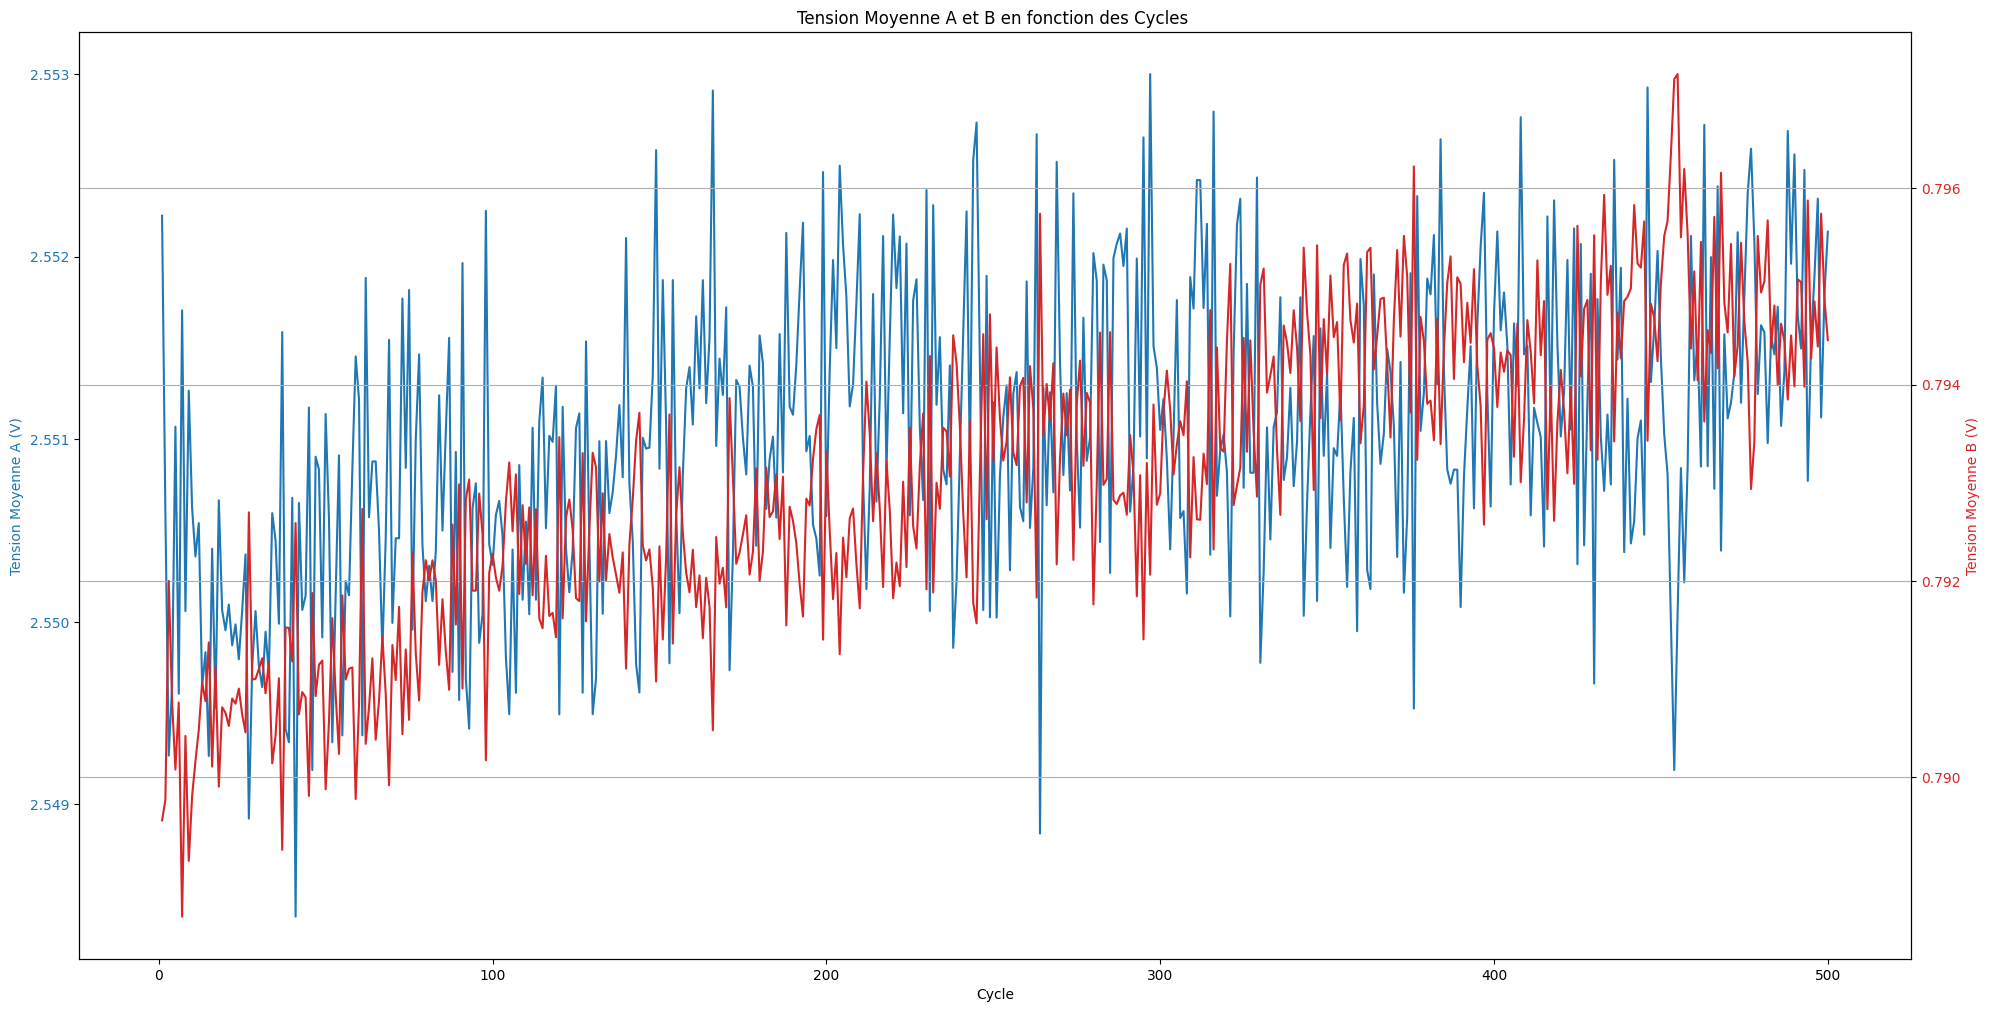

In [71]:
# Initialiser les DataFrames pour rassembler toutes les données de tension A et B
df_tension_tous_A = pd.DataFrame()
df_tension_tous_B = pd.DataFrame()

# Boucle pour accéder à chaque DataFrame stocké dans le dictionnaire dfs
for i in range(1, 10):
    df_key = f'df{i}'
    if df_key in dfs:
        # Extraire les données de tension A et de cycle
        df_temp_A = dfs[df_key][['CycleCnt01', 'BMS_Tension_A']].copy()
        # Ajouter les données de ce DataFrame au DataFrame global A
        df_tension_tous_A = pd.concat([df_tension_tous_A, df_temp_A])
        
        # Extraire les données de tension B et de cycle
        df_temp_B = dfs[df_key][['CycleCnt01', 'BMS_Tension_B']].copy()
        # Ajouter les données de ce DataFrame au DataFrame global B
        df_tension_tous_B = pd.concat([df_tension_tous_B, df_temp_B])

# Calculer la tension moyenne pour chaque cycle à travers tous les DataFrames pour A et B
tension_moyenne_par_cycle_global_A = df_tension_tous_A.groupby('CycleCnt01')['BMS_Tension_A'].mean()
tension_moyenne_par_cycle_global_B = df_tension_tous_B.groupby('CycleCnt01')['BMS_Tension_B'].mean()

# Créer le graphique avec deux axes des ordonnées
fig, ax1 = plt.subplots(figsize=(20, 10))

# Axe des ordonnées de gauche pour la tension A
color = 'tab:blue'
ax1.set_xlabel('Cycle')
ax1.set_ylabel('Tension Moyenne A (V)', color=color)
ax1.plot(tension_moyenne_par_cycle_global_A.index, tension_moyenne_par_cycle_global_A.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Axe des ordonnées de droite pour la tension B
ax2 = ax1.twinx()  # instancier un second axe des ordonnées partageant le même axe des x
color = 'tab:red'
ax2.set_ylabel('Tension Moyenne B (V)', color=color)  
ax2.plot(tension_moyenne_par_cycle_global_B.index, tension_moyenne_par_cycle_global_B.values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Autres configurations du graphique
fig.tight_layout()  # pour que le deuxième axe des y ne soit pas coupé
plt.title('Tension Moyenne A et B en fonction des Cycles ')
plt.grid(True)
plt.show()

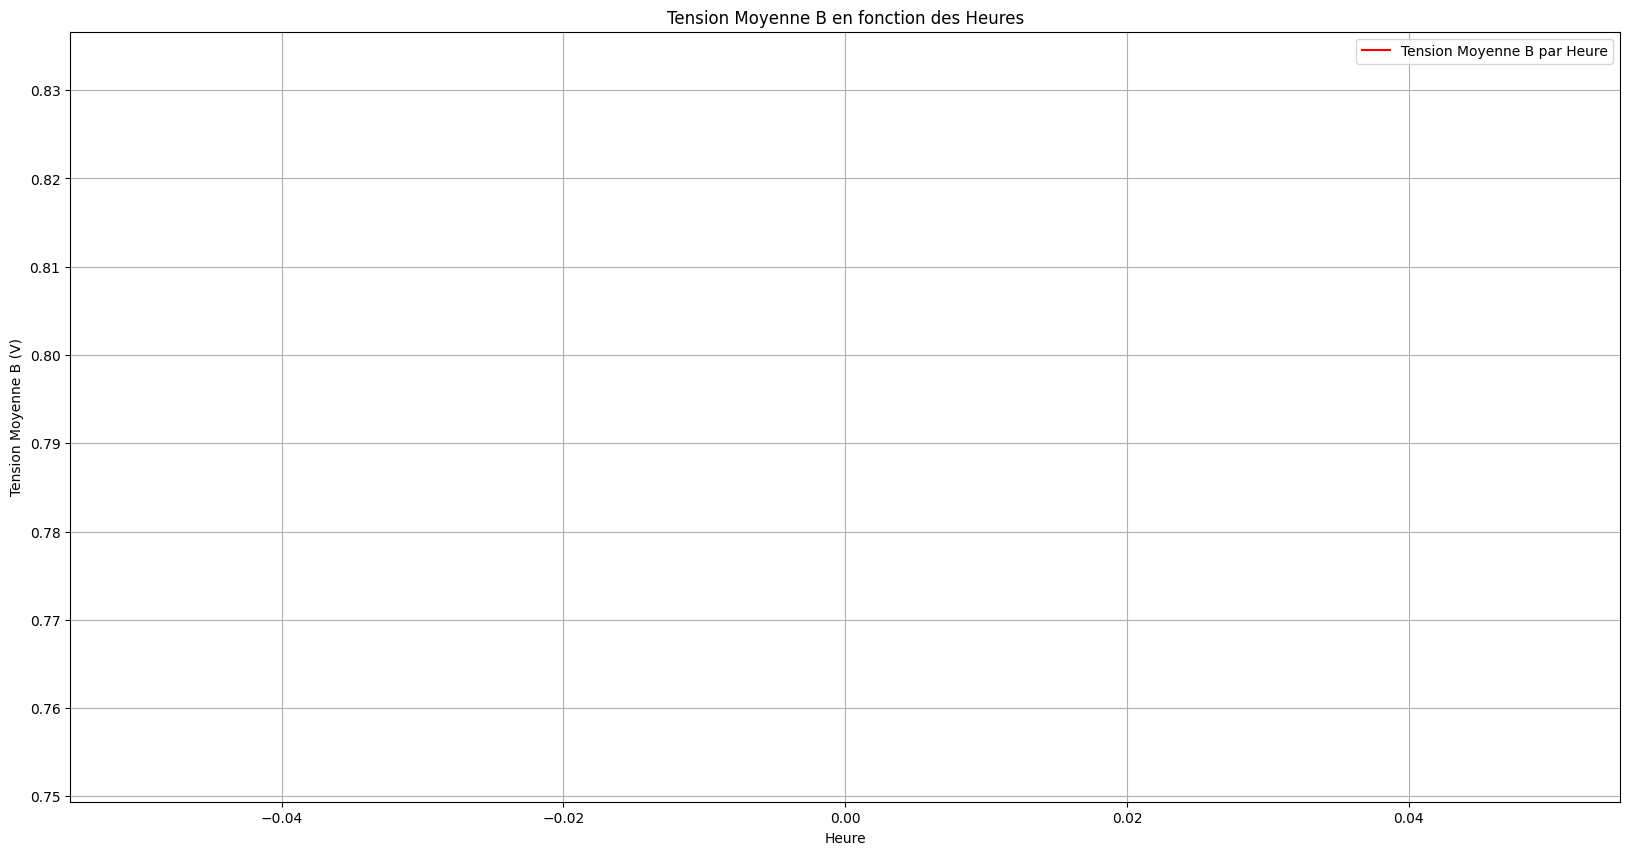

In [73]:
# Initialiser un DataFrame vide pour rassembler toutes les données de tension
df_tension_tous = pd.DataFrame()

# Boucle pour accéder à chaque DataFrame stocké dans le dictionnaire dfs et concaténer les données de tension
for i in range(1, 10):
    df_key = f'df{i}'
    if df_key in dfs:
        # Convertir le temps en heures à partir des secondes
        dfs[df_key]['Heure'] = dfs[df_key]['t'] / 3600  # 3600 secondes dans une heure
        
        # Extraire les données de tension, de cycle et d'heure
        df_temp = dfs[df_key][['CycleCnt01', 'BMS_Tension_B', 'Heure']].copy()
        
        # Ajouter les données de ce DataFrame au DataFrame global
        df_tension_tous = pd.concat([df_tension_tous, df_temp])


df_tension_tous['Heure_Arrondie'] = df_tension_tous['Heure'].round()
tension_moyenne_par_heure_global = df_tension_tous.groupby('Heure_Arrondie')['BMS_Tension_B'].mean()

# Tracer la tension moyenne globale pour chaque heure
plt.figure(figsize=(20, 10))
plt.plot(tension_moyenne_par_heure_global.index, tension_moyenne_par_heure_global.values, label='Tension Moyenne B par Heure', color='red')

plt.title('Tension Moyenne B en fonction des Heures')
plt.xlabel('Heure')
plt.ylabel('Tension Moyenne B (V)')
plt.legend()
plt.grid(True)
plt.show()

### Energie chargé et dechargé en fonction des cycles

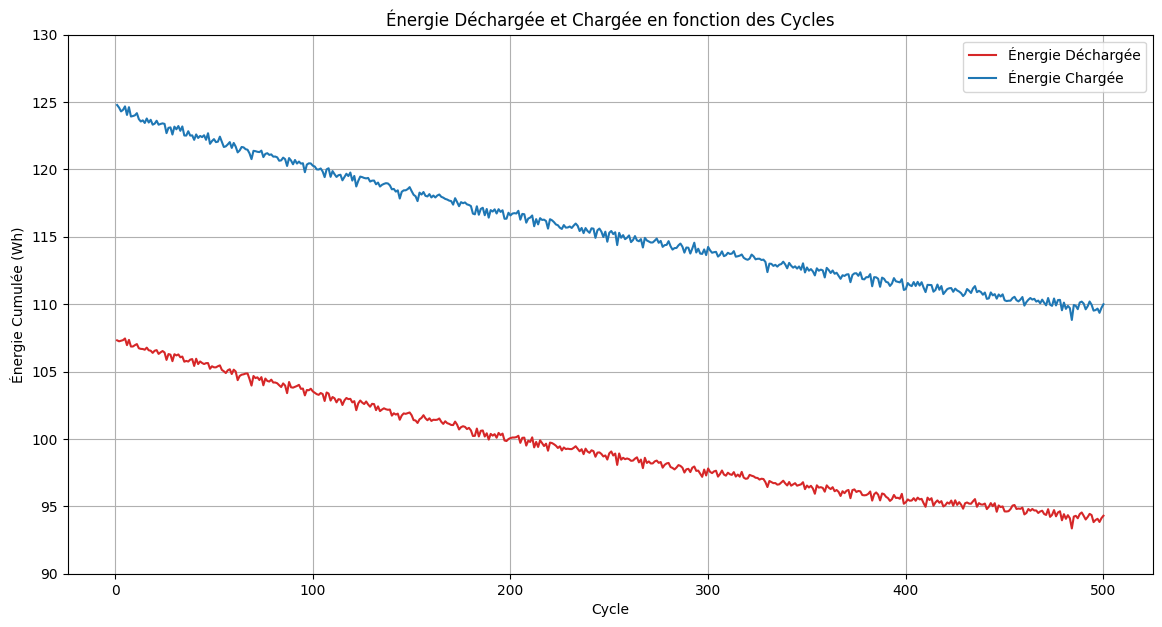

Energie chargé au premier cycle: 124.786
Energie chargé au 500e cycle: 109.99799999999959
Energie déchargé au premier cycle: 107.32
Energie déchargé au 500e cycle: 94.30299999999988


In [35]:
# Initialiser des listes pour stocker les données cumulatives d'énergie déchargée et chargée
energy_discharged_cumulative = pd.Series(dtype=float)
energy_charged_cumulative = pd.Series(dtype=float)

# Parcourir chaque DataFrame et calculer les sommes cumulatives d'énergie déchargée et chargée
for i in range(1, 10):
    df_key = f'df{i}'
    if df_key in dfs:
        # Calculer la différence d'énergie déchargée pour les cycles de décharge
        dfs[df_key]['Discharge_diff'] = dfs[df_key][dfs[df_key]['Etat_step'] == 2]['Wh_Discharge'].diff().fillna(0)

        # Calculer la différence d'énergie chargée pour les cycles de charge
        dfs[df_key]['Charge_diff'] = dfs[df_key][dfs[df_key]['Etat_step'] == 1]['Wh_Charge'].diff().fillna(0)
        
        # Somme cumulée pour l'énergie déchargée par cycle
        energy_discharged = dfs[df_key][dfs[df_key]['Etat_step'] == 2].groupby('CycleCnt01')['Discharge_diff'].sum()
        energy_discharged_cumulative = energy_discharged_cumulative.add(energy_discharged, fill_value=0)
        
        # Somme cumulée pour l'énergie chargée par cycle
        energy_charged = dfs[df_key][dfs[df_key]['Etat_step'] == 1].groupby('CycleCnt01')['Charge_diff'].sum()
        energy_charged_cumulative = energy_charged_cumulative.add(energy_charged, fill_value=0)

# Créer le graphique
plt.figure(figsize=(14, 7))

# Tracer l'énergie déchargée cumulée
plt.plot(energy_discharged_cumulative.index, energy_discharged_cumulative.values, color='tab:red', label='Énergie Déchargée')

# Tracer l'énergie chargée cumulée
plt.plot(energy_charged_cumulative.index, energy_charged_cumulative.values, color='tab:blue', label='Énergie Chargée')

# Ajouter des titres et des labels
plt.title('Énergie Déchargée et Chargée en fonction des Cycles')
plt.xlabel('Cycle')
plt.ylabel('Énergie Cumulée (Wh)')
plt.legend()
plt.grid(True)
plt.ylim(90, 130)  # Limiter l'axe des y à la plage souhaitée

# Afficher le graphique
plt.show()

print("Energie chargé au premier cycle:",energy_charged_cumulative[1])
print("Energie chargé au 500e cycle:",energy_charged_cumulative[500])
print("Energie déchargé au premier cycle:",energy_discharged_cumulative[1])
print("Energie déchargé au 500e cycle:",energy_discharged_cumulative[500])

### Test pour le SOH

$ SOH (\%) = \frac{Capacité\_résiduelle}{Capacité\_nominale} \times 100 $


In [67]:
# Initialiser des Series pour stocker les données cumulatives d'ampère-heures déchargées et chargées
ah_discharged_cumulative = pd.Series(dtype=float)
ah_charged_cumulative = pd.Series(dtype=float)

# Parcourir chaque DataFrame et calculer les sommes cumulatives d'ampère-heures déchargées et chargées
for i in range(1, 10):
    df_key = f'df{i}'
    if df_key in dfs:
        # Calculer la différence d'Ah déchargée pour les cycles de décharge
        dfs[df_key]['Discharge_diff_Ah'] = dfs[df_key][dfs[df_key]['Etat_step'] == 2]['Ah_Discharge'].diff().fillna(0)

        # Calculer la différence d'Ah chargée pour les cycles de charge
        dfs[df_key]['Charge_diff_Ah'] = dfs[df_key][dfs[df_key]['Etat_step'] == 1]['Ah_Charge'].diff().fillna(0)
        
        # Somme cumulée pour l'Ah déchargée par cycle
        ah_discharged = dfs[df_key][dfs[df_key]['Etat_step'] == 2].groupby('CycleCnt01')['Discharge_diff_Ah'].sum()
        ah_discharged_cumulative = ah_discharged_cumulative.add(ah_discharged, fill_value=0)
        
        # Somme cumulée pour l'Ah chargée par cycle
        ah_charged = dfs[df_key][dfs[df_key]['Etat_step'] == 1].groupby('CycleCnt01')['Charge_diff_Ah'].sum()
        ah_charged_cumulative = ah_charged_cumulative.add(ah_charged, fill_value=0)

print("Energie chargé au premier cycle:",ah_charged_cumulative[1])
print("Energie chargé au 500e cycle:",ah_charged_cumulative[500])
print("Energie déchargé au premier cycle:",ah_discharged_cumulative[1])
print("Energie déchargé au 500e cycle:",ah_discharged_cumulative[500])

Energie chargé au premier cycle: 2.519
Energie chargé au 500e cycle: 2.211999999999989
Energie déchargé au premier cycle: 2.502
Energie déchargé au 500e cycle: 2.1980000000000928


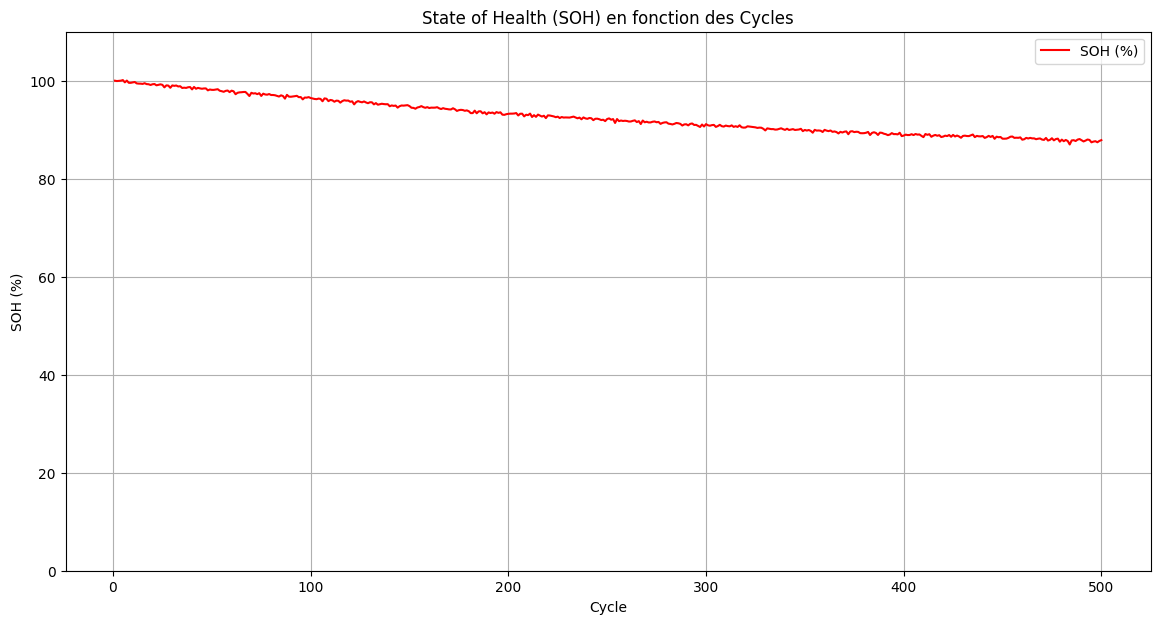

In [63]:
capacite_nominale = energy_discharged_cumulative[1]  


soh_par_cycle_Wh = (energy_discharged_cumulative / capacite_nominale) * 100

# Tracer le SOH en fonction des cycles
plt.figure(figsize=(14, 7))
plt.plot(soh_par_cycle_Wh.index, soh_par_cycle_Wh.values, linestyle='-', color='red', label='SOH (%)')

plt.title('State of Health (SOH) en fonction des Cycles')
plt.xlabel('Cycle')
plt.ylabel('SOH (%)')
plt.legend()
plt.grid(True)
plt.ylim(0, 110)
plt.show()

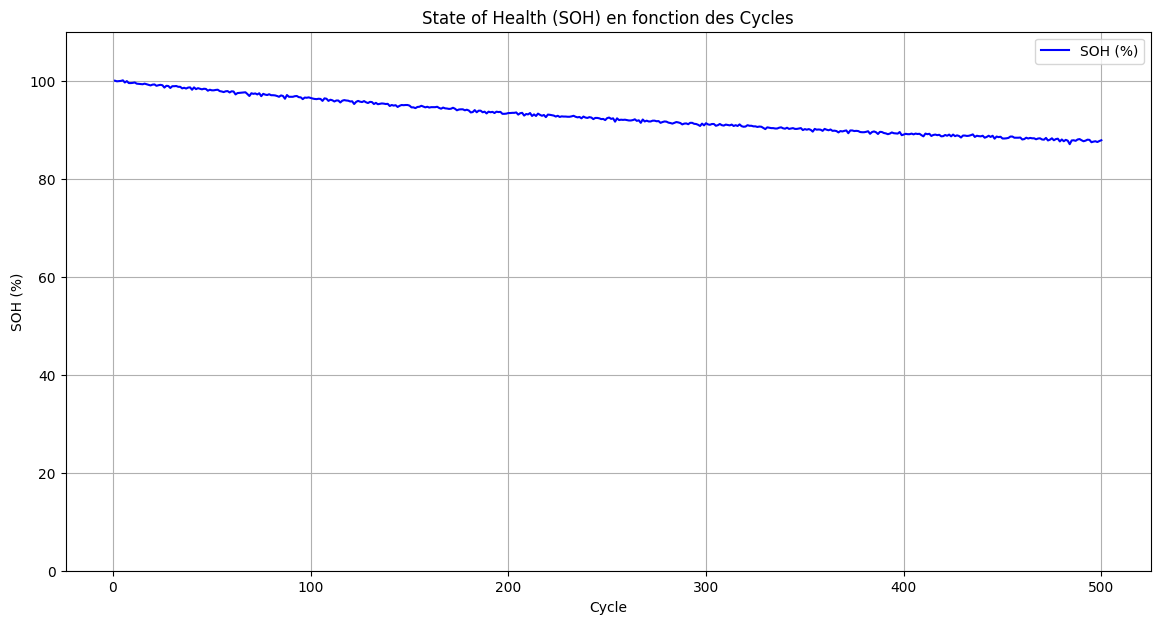

In [69]:
capacite_nominale_Ah = ah_discharged_cumulative[1]  


soh_par_cycle_Ah = (ah_discharged_cumulative / capacite_nominale_Ah) * 100

# Tracer le SOH en fonction des cycles
plt.figure(figsize=(14, 7))
plt.plot(soh_par_cycle_Ah.index, soh_par_cycle_Ah.values, color='blue', label='SOH (%)')

plt.title('State of Health (SOH) en fonction des Cycles')
plt.xlabel('Cycle')
plt.ylabel('SOH (%)')
plt.legend()
plt.grid(True)
plt.ylim(0, 110)
plt.show()

In [70]:
print("SOH au premier cycle:",soh_par_cycle_Wh[1])
print("SOH au 500e cycle:",soh_par_cycle_Wh[500])


print("SOH au premier cycle:",soh_par_cycle_Ah[1])
print("SOH au 500e cycle:",soh_par_cycle_Ah[500])




SOH au premier cycle: 100.0
Energie au 500e cycle: 87.87085352217656
SOH au premier cycle: 100.0
SOH au 500e cycle: 87.84972022382466


### Test pour le SOC


### Rendement énergétique

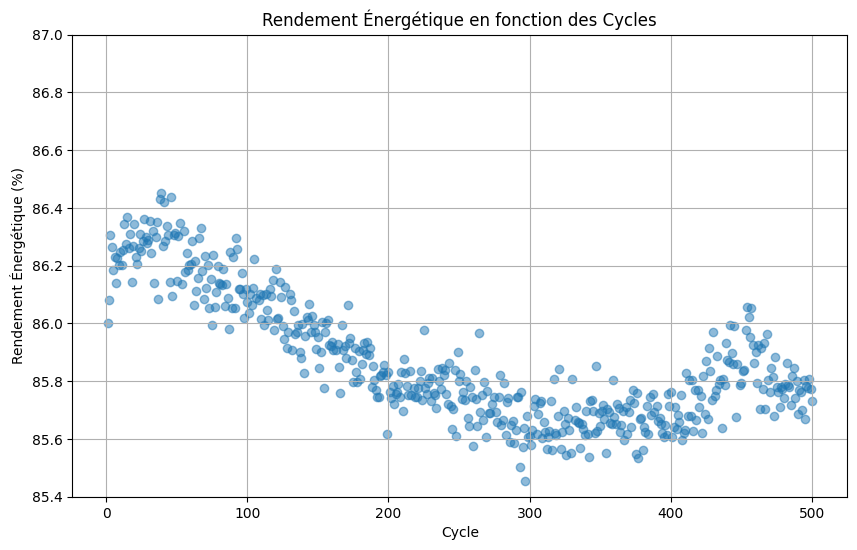

In [27]:
# Initialiser les listes pour stocker les données agrégées
cycles_filtres = []
rendement_filtres = []
cycles_tous = []
rendement_tous = []

for i in range(1, 10):
    df_key = f'df{i}'
    if df_key in dfs:  
        # Filtrer les données pour les cycles de décharge et de charge
        df_discharge = dfs[df_key][dfs[df_key]['Etat_step'] == 2].copy()
        df_charge = dfs[df_key][dfs[df_key]['Etat_step'] == 1].copy()
        
        # Calculer l'énergie déchargée et chargée par cycle
        df_discharge['Energie_diff'] = df_discharge['Wh_Discharge'].diff().fillna(0)
        df_charge['Energie_diff'] = df_charge['Wh_Charge'].diff().fillna(0)
        
        # Calculer le rendement énergétique par cycle
        for cycle in set(df_discharge['CycleCnt01']).intersection(set(df_charge['CycleCnt01'])):
            energie_discharge = df_discharge[df_discharge['CycleCnt01'] == cycle]['Energie_diff'].sum()
            energie_charge = df_charge[df_charge['CycleCnt01'] == cycle]['Energie_diff'].sum()
            if energie_charge > 0:  # Éviter la division par zéro
                rendement = (energie_discharge / energie_charge) * 100
                cycles_tous.append(cycle)
                rendement_tous.append(rendement)

# Filtrer pour inclure uniquement les valeurs de rendement entre 50 et 100
for cycle, rendement in zip(cycles_tous, rendement_tous):
    if 85 <= rendement <= 90:
        cycles_filtres.append(cycle)
        rendement_filtres.append(rendement)

# Tracer le rendement énergétique filtré pour tous les cycles sur un seul graphique
plt.figure(figsize=(10, 6))
plt.scatter(cycles_filtres, rendement_filtres, alpha=0.5)
plt.title('Rendement Énergétique en fonction des Cycles')
plt.xlabel('Cycle')
plt.ylabel('Rendement Énergétique (%)')
plt.grid(True)
plt.ylim(85.4, 87)  
plt.show()

### Temperature

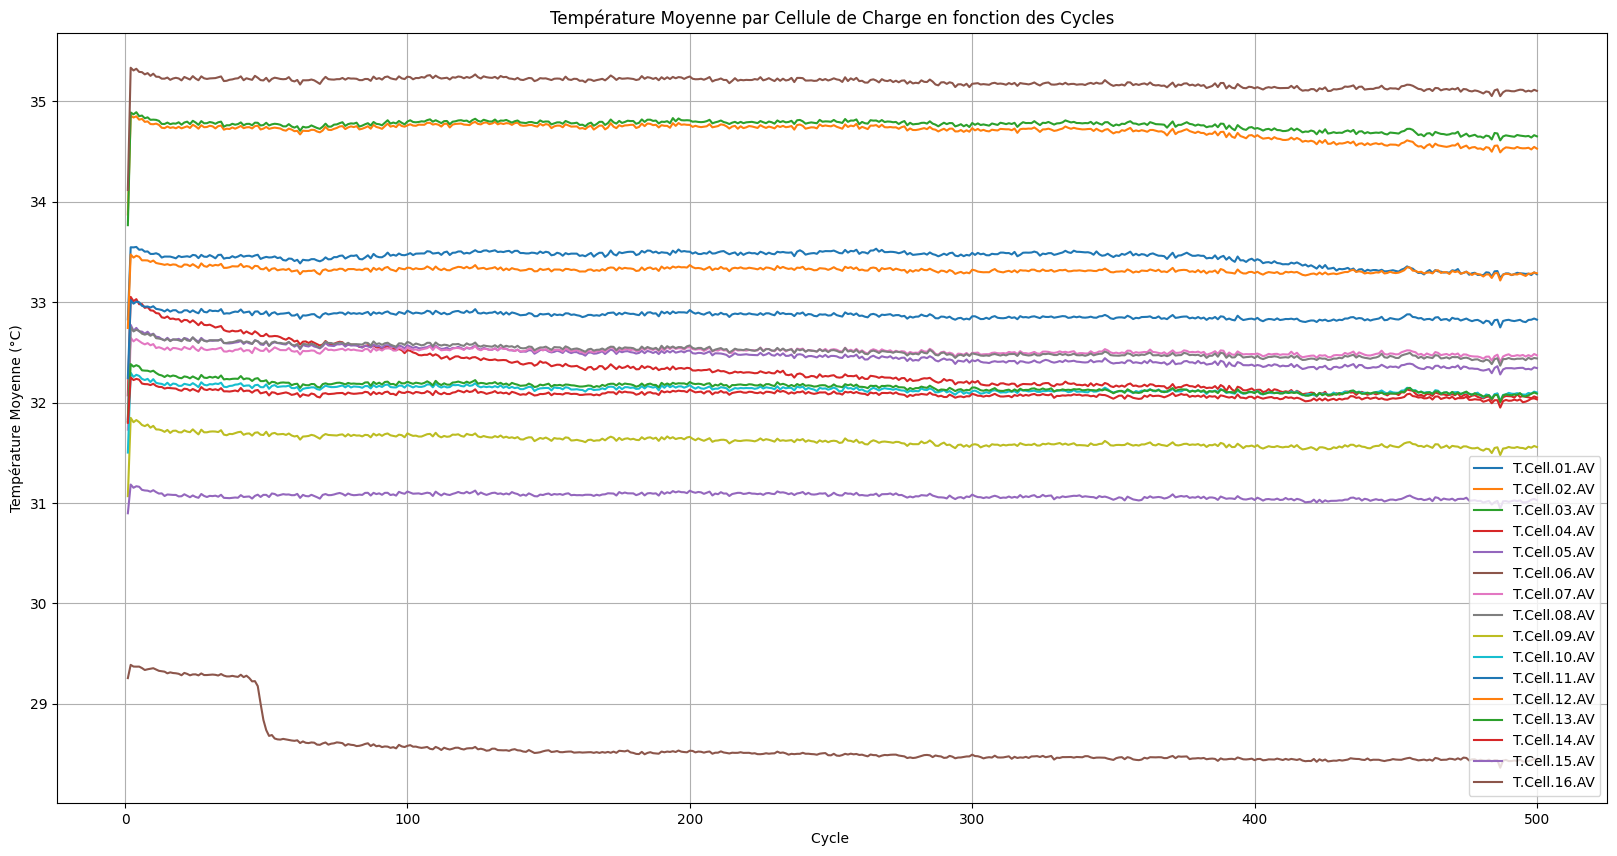

In [31]:
# Initialiser un DataFrame pour rassembler les données de température moyenne par cycle pour tous les df
temp_means_by_cycle = pd.DataFrame()
temp_columns = [f'T.Cell.{str(i).zfill(2)}.AV' for i in range(1, 17)]

# Initialiser une liste pour stocker les températures moyennes pour tous les cycles
temp_moyennes_tous_cycles = []

# Initialiser le graphique
plt.figure(figsize=(20, 10))

# Parcourir chaque colonne de température
for temp_col in temp_columns:
    all_temps = []

    # Parcourir chaque DataFrame
    for i in range(1, 10):
        df_key = f'df{i}'
        if df_key in dfs:
            # Vérifier si la colonne de température est dans le DataFrame
            if temp_col in dfs[df_key].columns:
                # Extraire la colonne des cycles et la colonne de température
                df_temps = dfs[df_key][['CycleCnt01', temp_col]].copy()
                # Garder seulement les lignes avec des valeurs non-nulles
                df_temps.dropna(subset=[temp_col], inplace=True)
                all_temps.append(df_temps)
    
    # Concaténer les données de température pour toutes les parties
    df_all_temps = pd.concat(all_temps)
    # Calculer la température moyenne par cycle
    temp_moyenne_par_cycle = df_all_temps.groupby('CycleCnt01')[temp_col].mean()

    # Tracer la courbe de température moyenne pour cette cellule
    plt.plot(temp_moyenne_par_cycle.index, temp_moyenne_par_cycle.values,  linestyle='-', label=temp_col)

# Configurer le titre et les légendes
plt.title('Température Moyenne par Cellule de Charge en fonction des Cycles')
plt.xlabel('Cycle ')
plt.ylabel('Température Moyenne (°C)')
plt.legend()
plt.grid(True)
plt.show()

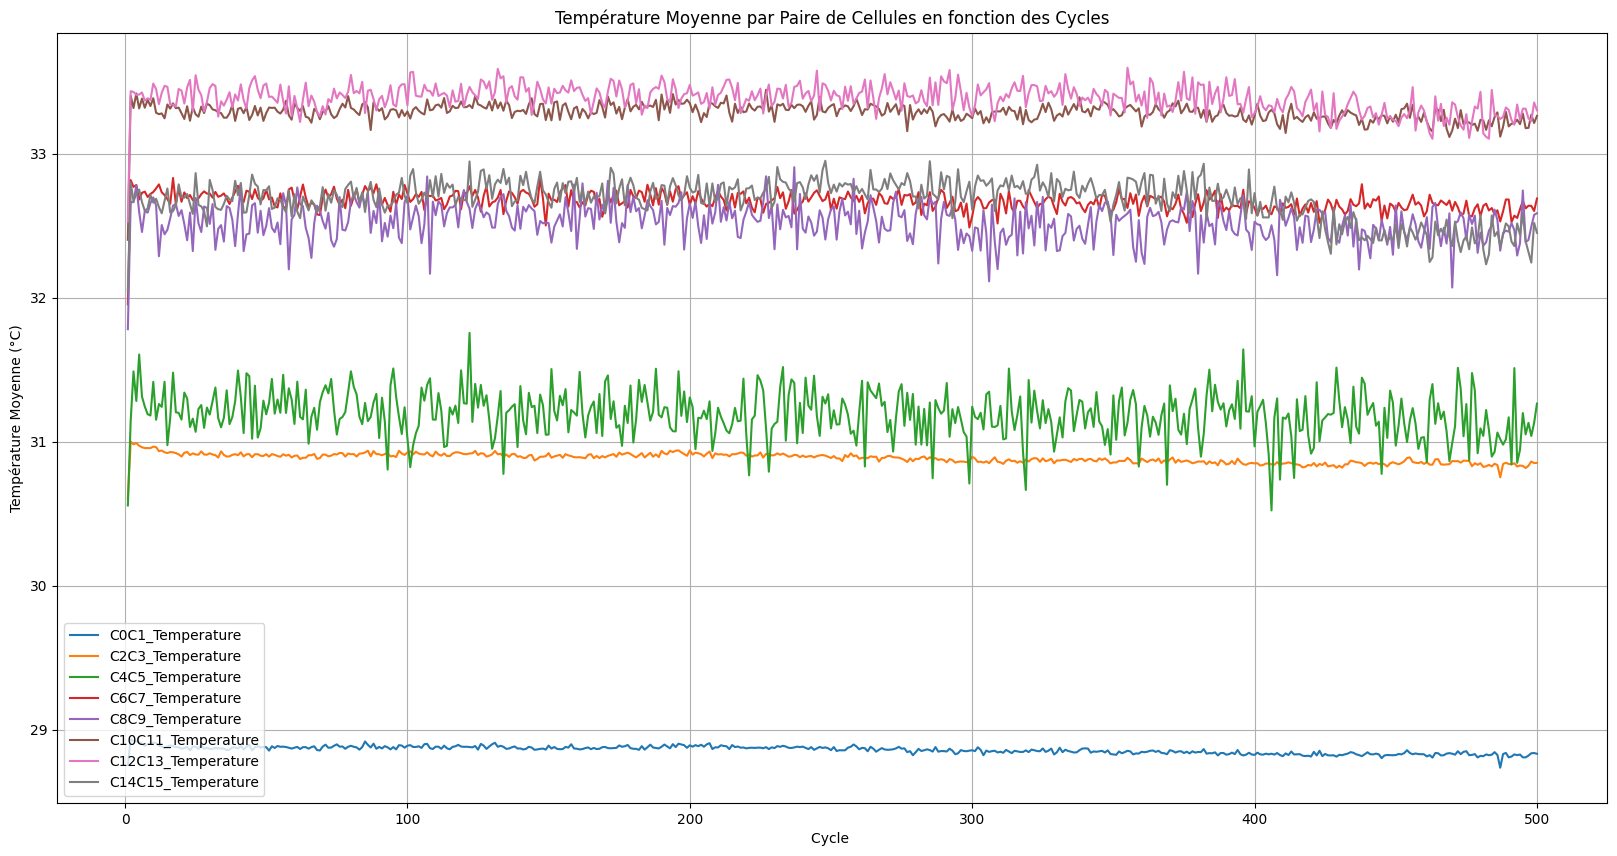

In [36]:
# Initialiser un DataFrame pour rassembler les données de température moyenne par cycle pour tous les df
temp_means_by_cycle = pd.DataFrame()

# Définir les nouvelles colonnes de température selon les paires de cellules
temp_columns = [
    'C0C1_Temperature', 'C2C3_Temperature', 'C4C5_Temperature', 
    'C6C7_Temperature', 'C8C9_Temperature', 'C10C11_Temperature', 
    'C12C13_Temperature', 'C14C15_Temperature'
]

# Initialiser le graphique
plt.figure(figsize=(20, 10))

# Parcourir chaque colonne de température
for temp_col in temp_columns:
    all_temps = []

    # Parcourir chaque DataFrame
    for i in range(1, 10):
        df_key = f'df{i}'
        if df_key in dfs:
            # Vérifier si la colonne de température est dans le DataFrame
            if temp_col in dfs[df_key].columns:
                # Extraire la colonne des cycles et la colonne de température
                df_temps = dfs[df_key][['CycleCnt01', temp_col]].copy()
                # Garder seulement les lignes avec des valeurs non-nulles
                df_temps.dropna(subset=[temp_col], inplace=True)
                all_temps.append(df_temps)
    
    # Concaténer les données de température pour toutes les parties
    df_all_temps = pd.concat(all_temps)
    # Calculer la température moyenne par cycle
    temp_moyenne_par_cycle = df_all_temps.groupby('CycleCnt01')[temp_col].mean()

    # Tracer la courbe de température moyenne pour cette cellule
    plt.plot(temp_moyenne_par_cycle.index, temp_moyenne_par_cycle.values, linestyle='-', label=temp_col)

# Configurer le titre et les légendes
plt.title('Température Moyenne par Paire de Cellules en fonction des Cycles')
plt.xlabel('Cycle ')
plt.ylabel('Température Moyenne (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def estimer_soc(df):
    dt = df['t'].diff()  # Calculer la différence de temps entre les échantillons
    charge_in = (df['Ah'] > 0) * df['Ah'] * dt  # Calculer la charge entrante (courant positif)
    charge_out = (df['Ah'] < 0) * df['Ah'] * dt  # Calculer la charge sortante (courant négatif)
    soc = (charge_in.sum() - charge_out.sum()) / (3600 * 4.2) * 100  # SOC en pourcentage
    return soc

# Estimer le SOC à partir du dataframe
soc_estime = estimer_soc(df)

# Tracer le graphe SOC en fonction du temps
plt.figure(figsize=(10, 6))
plt.plot(df['t'], soc_estime)
plt.title('Estimation du SOC en fonction du temps')
plt.xlabel('Temps')
plt.ylabel('SOC (%)')
plt.grid(True)
plt.show()

In [ ]:
# Créer une liste pour stocker les résultats des modèles
resultats = []

# Répéter l'opération pour 10 échantillons
for i in range(10):
    # Extraire un échantillon de taille 1000
    echantillon = df.sample(n=1000, random_state=i)
    
    # Diviser l'échantillon en features (X) et la cible (y)
    X = echantillon[['t']]
    y = echantillon['BMS_Tension_A']
    
    # Diviser les données en ensemble d'entraînement et ensemble de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Créer un objet de modèle de régression linéaire
    model = LinearRegression()
    
    # Entraîner le modèle sur l'ensemble d'entraînement
    model.fit(X_train, y_train)
    
    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Coefficients de régression
    coefficients = model.coef_
    
    # Erreur quadratique moyenne
    mse = mean_squared_error(y_test, y_pred)
    
    # Coefficient de détermination (R²)
    r2 = r2_score(y_test, y_pred)
    
    # Ajouter les résultats à la liste
    resultats.append({'Coefficients': coefficients, 'MSE': mse, 'R2': r2})

# Afficher les résultats
for i, resultat in enumerate(resultats):
    print(f"Résultats pour l'échantillon {i+1}:")
    print("Coefficients de régression:", resultat['Coefficients'])
    print("Mean Squared Error:", resultat['MSE'])
    print("Coefficient of Determination (R²):", resultat['R2'])
    print("\n")



In [ ]:
# Créer une liste pour stocker les résultats des modèles
resultats = []

# Créer une figure pour le tracé
plt.figure(figsize=(10, 6))

# Répéter l'opération pour 10 échantillons
for i in range(10):
    # Extraire un échantillon de taille 1000
    echantillon = df.sample(n=1000, random_state=i)
    
    # Diviser l'échantillon en features (X) et la cible (y)
    X = echantillon[['t']]
    y = echantillon['BMS_Tension_A']
    
    # Diviser les données en ensemble d'entraînement et ensemble de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Créer un objet de modèle de régression linéaire
    model = LinearRegression()
    
    # Entraîner le modèle sur l'ensemble d'entraînement
    model.fit(X_train, y_train)
    
    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Ajouter les résultats à la liste
    resultats.append({'t': X_test.values.flatten(), 'Tension_predite': y_pred})

# Tracer les résultats de toutes les régressions
for i, resultat in enumerate(resultats):
    temps = resultat['t']
    tension_predite = resultat['Tension_predite']
    plt.scatter(temps, tension_predite, label=f'Régression {i+1}')

# Ajouter une légende et des labels d'axes
plt.xlabel('Temps')
plt.ylabel('Tension prédite')
plt.title('Régressions linéaires pour 10 échantillons')
plt.legend()
plt.show()

In [ ]:
# Fonction pour modéliser la chute de tension lors de la décharge de la batterie
def drop_tension(t, Ri, Voc):
    return Voc - Ri * t

# Fonction pour estimer la résistance interne pour un intervalle de temps donné avec un courant de décharge négatif
def estimer_resistance_interne_interval(df_interval):
    # Sélectionner les données de décharge avec un courant négatif
    df_decharge = df_interval[df_interval['Ah'] < 0]
    
    # Estimer la résistance interne en ajustant la courbe à l'aide de la méthode des moindres carrés
    popt, _ = curve_fit(drop_tension, df_decharge['t'], df_decharge['BMS_Tension_A'])
    resistance_interne = popt[0]  # Le premier élément de popt est la résistance interne estimée
    
    return resistance_interne

# Fonction pour diviser les données de décharge en intervalles de temps et estimer la résistance interne pour chaque intervalle
def estimer_resistance_interne_dynamique(df, num_intervals=10):
    # Diviser les données en intervalles de temps égaux
    interval_length = len(df) // num_intervals
    intervals = [df.iloc[i*interval_length:(i+1)*interval_length] for i in range(num_intervals)]
    
    # Estimer la résistance interne pour chaque intervalle
    resistances = [estimer_resistance_interne_interval(interval) for interval in intervals]
    
    return resistances
# Appeler la fonction pour estimer la résistance interne dynamique
resistances_dynamiques = estimer_resistance_interne_dynamique(df_decharge)

# Afficher les estimations de résistance interne pour chaque intervalle de temps
print("Estimations de la résistance interne pour chaque intervalle de temps :")
for i, resistance in enumerate(resistances_dynamiques):
    print(f"Intervalle {i+1}: {resistance} Ohms")


# Appeler la fonction pour estimer la résistance interne dynamique
resistances_dynamiques = estimer_resistance_interne_dynamique(df_decharge)

# Créer une liste des temps de début de chaque intervalle
temps_debut_intervalles = [interval['Temps'].iloc[0] for interval in intervals]

# Tracer le graphique de la résistance en fonction du temps
plt.plot(temps_debut_intervalles, resistances_dynamiques, marker='o')
plt.xlabel('Temps (s)')
plt.ylabel('Résistance interne (Ohms)')
plt.title('Résistance interne de la batterie en fonction du temps de décharge')
plt.grid(True)
plt.show()

test

In [ ]:
# Histogrammes
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


In [ ]:
# Calculer la matrice de corrélation
# Sélectionner uniquement les colonnes à inclure dans la matrice de corrélation
colonnes_a_inclure = df.columns[:-32]

# Calculer la matrice de corrélation en utilisant les colonnes sélectionnées
correlation_matrix = df[colonnes_a_inclure].corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()